In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from matplotlib import pyplot as plt
import folium

## World Happiness Country

In [3]:
speeches_df = pd.read_csv("../TextVisualization/Data/Processed/preprocessed_speech.csv", index_col=0)
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/727706422.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [4]:
happiness = pd.merge(speeches_df, countries, left_on="country", right_on="iso_a3")
happiness["GDP per Capita"] = np.exp(happiness["Log GDP per capita"])
happiness = GeoDataFrame(happiness, geometry=happiness["geometry"])
happiness_point = happiness.copy()
happiness_point["geometry"] = happiness_point["geometry"].centroid
happiness_point = happiness_point.sort_values("year", ascending=True)
longitude, latitude = (
    happiness_point["geometry"].x,
    happiness_point["geometry"].y,
)
happiness_point["longitude"] = longitude
happiness_point["latitude"] = latitude

/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/2266196883.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  happiness_point["geometry"] = happiness_point["geometry"].centroid


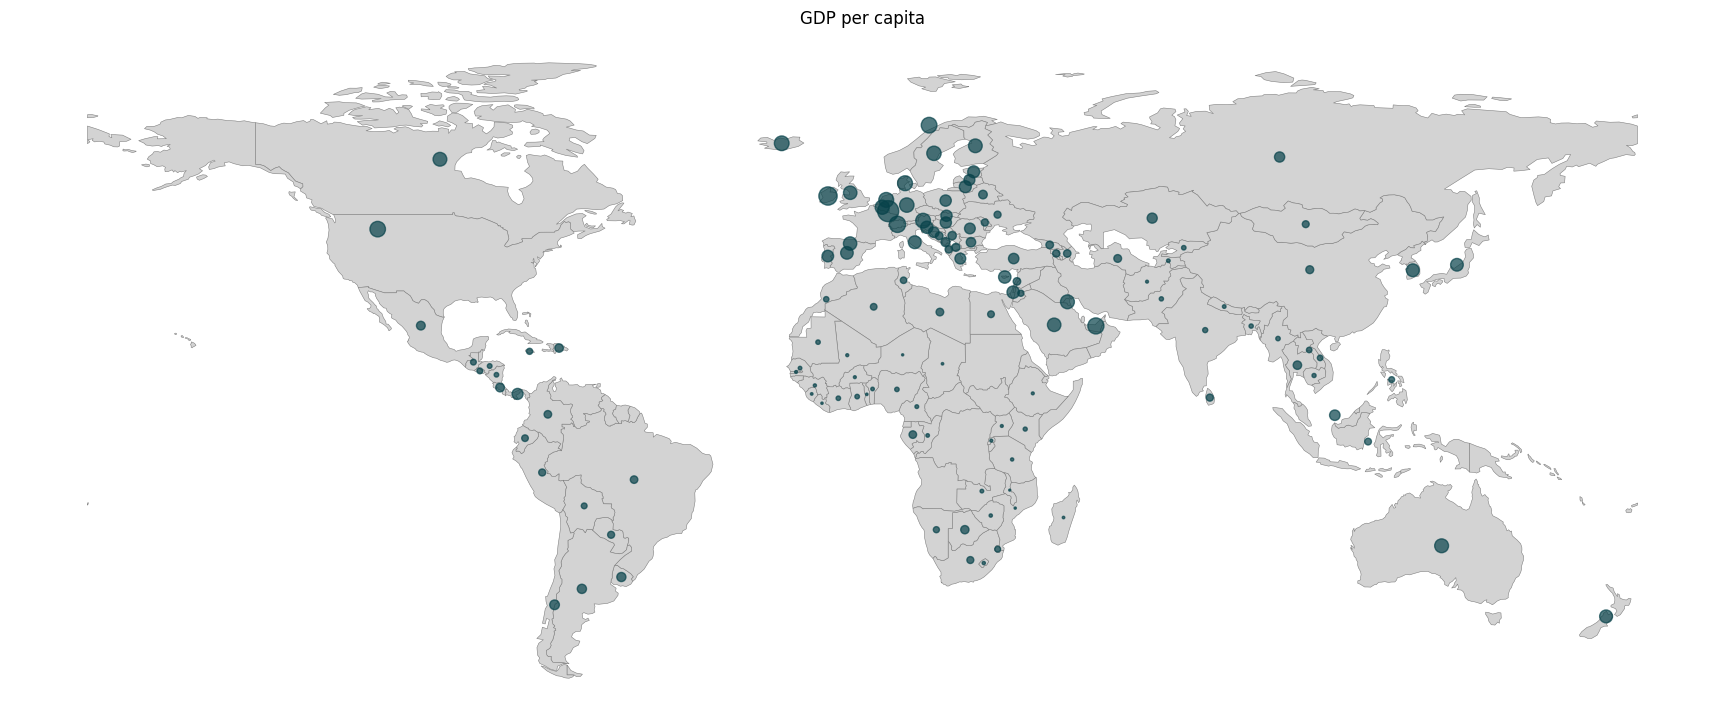

In [5]:
# bubble
fig, ax = plt.subplots(figsize=(22, 20))
marker = happiness_point.query("year == 2019")["GDP per Capita"] / 500
happiness.query("year == 2019").plot(
    ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4
)
happiness_point.query("year == 2019").plot(
    ax=ax, color="#07424A", markersize=marker, alpha=0.7, categorical=False, legend=True
) 
ax.axis("off")
plt.title("GDP per capita")
plt.show()

In [6]:
# plottly
fig_scatter = px.scatter_mapbox(
    happiness_point.query("year==2019").dropna(subset="GDP per Capita"),
    lat="latitude",
    lon="longitude",
    color="continent",
    size="GDP per Capita",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    hover_name="name",
    mapbox_style="carto-darkmatter",
    zoom=1,
)
fig_scatter.show()

<Axes: >

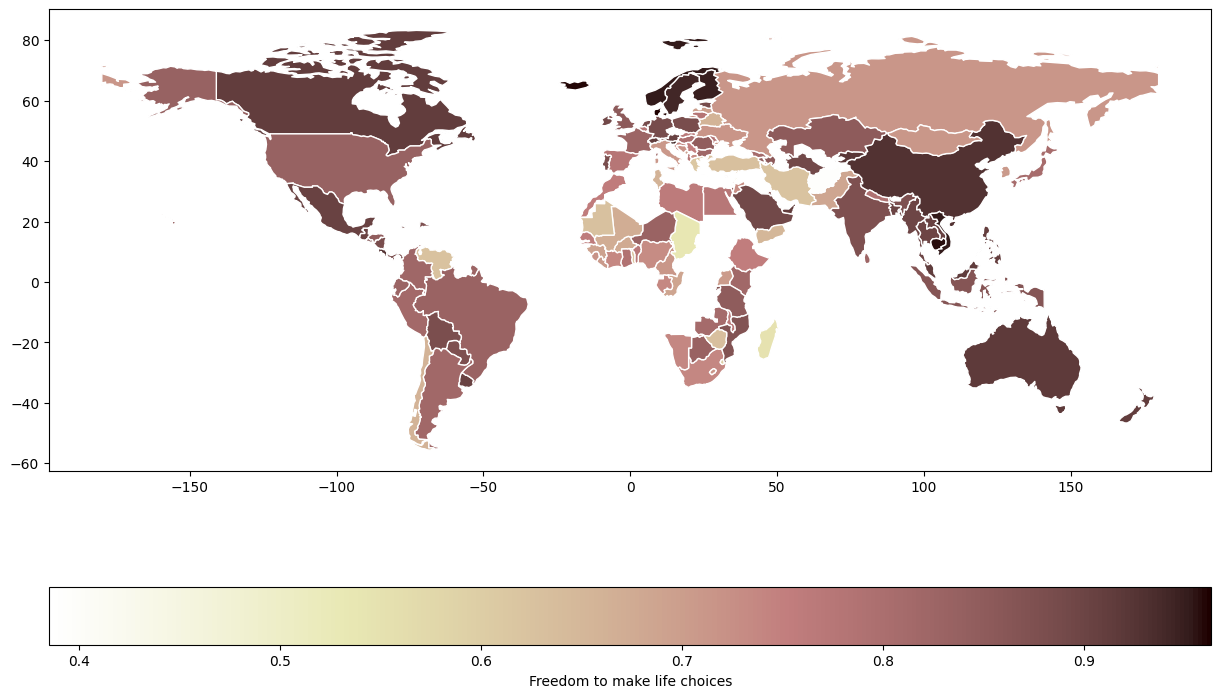

In [7]:
# choropleth
happiness.query("year ==2019").plot(
    column="Freedom to make life choices",
    figsize=(15, 10),
    legend=True,
    edgecolor="white",
    cmap="pink_r",
    legend_kwds={"label": "Freedom to make life choices", "orientation": "horizontal"},
)

In [8]:
fig_world_map = px.choropleth(
    happiness.query("year == 2019").dropna(subset=["Freedom to make life choices"]),
    locations="ISO-alpha3 Code",
    color="Freedom to make life choices",
    hover_name="Country or Area",
    color_continuous_scale=px.colors.sequential.Brwnyl,
)
fig_world_map

In [9]:
anxiety = pd.read_csv("Data/anxiety-disorders.csv")
anxiety

,Entity,Code,Year,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.713314,NaN,10694804.0,NaN
2,Afghanistan,AFG,1991,4.702100,NaN,10745168.0,NaN
3,Afghanistan,AFG,1992,4.683743,NaN,12057436.0,NaN
4,Afghanistan,AFG,1993,4.673549,NaN,14003764.0,NaN
...,...,...,...,...,...,...,...
58665,Zimbabwe,ZWE,1986,NaN,NaN,8983048.0,NaN
58666,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58667,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58668,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN


In [10]:
anxiety = anxiety.dropna(
    subset=[
        "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
        "GDP per capita, PPP (constant 2017 international $)",
    ]
)

In [11]:
anxiety = pd.merge(anxiety, countries, left_on="Code", right_on="iso_a3")
anxiety = GeoDataFrame(anxiety, geometry=anxiety["geometry"])
anxiety = anxiety.copy()
anxiety["geometry"] = anxiety["geometry"].centroid
anxiety = anxiety.sort_values("Year", ascending=True)
longitude, latitude = anxiety["geometry"].x, anxiety["geometry"].y
anxiety["longitude"] = longitude
anxiety["latitude"] = latitude

/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/3761927194.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [12]:
scatter_anxiety = px.scatter(
    anxiety.dropna(
        subset=[
            "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
            "GDP per capita, PPP (constant 2017 international $)",
        ]
    ),
    color="continent",
    size="pop_est",
    color_continuous_scale=px.colors.cyclical.IceFire,
    animation_frame="Year",
    animation_group="Code",
    hover_name="Entity",
    size_max=35,
    # mapbox_style="carto-darkmatter",
    x="GDP per capita, PPP (constant 2017 international $)",
    y="Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
    log_x=True,
    # text = "Entity"
)
scatter_anxiety.update_layout(yaxis_title="Anxiety disorders (share of population)")
scatter_anxiety.update_xaxes(showgrid=False)
scatter_anxiety.update_yaxes(showgrid=False)
scatter_anxiety.show()

In [13]:
conflict = pd.read_csv("Data/conflict.csv")
conflict = conflict[~conflict.event_type.isin(['Protests', 'Explosions/Remote violence'])]
conflict = conflict.merge(countries, left_on="country", right_on="name")
conflict = GeoDataFrame(conflict, geometry=conflict["geometry"])
conflict["point_geometry"] = conflict["geometry"].centroid
Alongitude, Alatitude = conflict["point_geometry"].x, conflict["point_geometry"].y
conflict["longitude"] = Alongitude
conflict["latitude"] = Alatitude
conflict

/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/3989498641.py:5: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,fatalities,tags,timestamp,pop_est,continent,name,iso_a3,gdp_md_est,geometry,point_geometry
0,ETH10135,16 June 2023,2023,1,Political violence,Battles,Armed clash,Amhara Ethnic Militia (Ethiopia),NaN,4,...,3,NaN,1687188834,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",POINT (39.55126 8.65400)
1,ETH10137,15 June 2023,2023,1,Political violence,Battles,Armed clash,Fano Youth Militia,NaN,3,...,0,NaN,1687188834,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",POINT (39.55126 8.65400)
2,ETH10150,15 June 2023,2023,1,Political violence,Violence against civilians,Attack,Fano Youth Militia,NaN,3,...,8,NaN,1687188834,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",POINT (39.55126 8.65400)
3,ETH10151,15 June 2023,2023,1,Political violence,Violence against civilians,Attack,Fano Youth Militia,NaN,3,...,0,NaN,1687188834,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",POINT (39.55126 8.65400)
4,ETH10141,14 June 2023,2023,2,Political violence,Battles,Armed clash,OLF: Oromo Liberation Front (Shane Splinter Fa...,NaN,2,...,22,NaN,1687188834,112078730.0,Africa,Ethiopia,ETH,95912,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ...",POINT (39.55126 8.65400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285403,BTN6,09 March 2021,2021,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Bhutan),NaN,3,...,0,NaN,1631898053,763092.0,Asia,Bhutan,BTN,2530,"POLYGON ((91.69666 27.77174, 92.10371 27.45261...",POINT (90.47242 27.42797)
285404,BTN5,17 February 2021,2021,1,Political violence,Violence against civilians,Attack,Police Forces of Bhutan (2018-),NaN,1,...,0,NaN,1631898054,763092.0,Asia,Bhutan,BTN,2530,"POLYGON ((91.69666 27.77174, 92.10371 27.45261...",POINT (90.47242 27.42797)
285405,BTN4,16 February 2021,2021,1,Strategic developments,Strategic developments,Arrests,Military Forces of Bhutan (2018-),NaN,1,...,0,NaN,1631898053,763092.0,Asia,Bhutan,BTN,2530,"POLYGON ((91.69666 27.77174, 92.10371 27.45261...",POINT (90.47242 27.42797)
285406,LUX72,11 December 2021,2021,1,Demonstrations,Riots,Violent demonstration,Rioters (Luxembourg),NaN,5,...,0,crowd size=between 1000 and 1500,1641942161,619896.0,Europe,Luxembourg,LUX,71104,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",POINT (5.96522 49.76571)


In [43]:
earthquake = gpd.read_file(
    "Data/earthquake.csv"
)
from shapely.geometry import Point 
earthquake['geometry'] = earthquake.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/2652066419.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



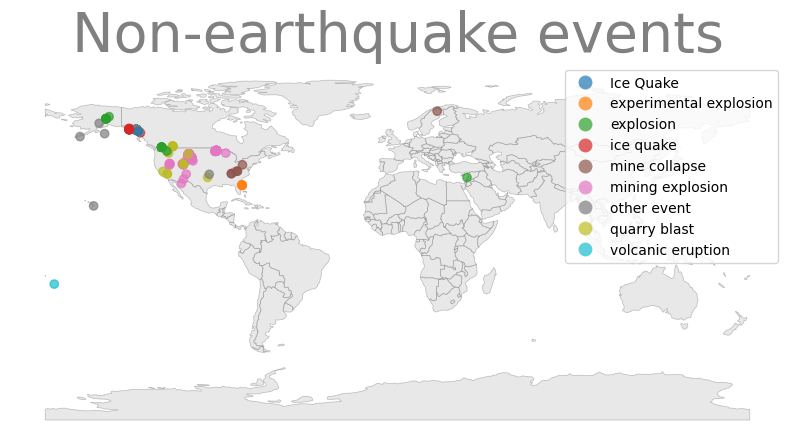

In [64]:
# multiplayer maps
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
countries.plot(ax=ax, linewidth=0.5, edgecolor="grey", 
               facecolor="lightgrey", alpha=0.5)
earthquake = earthquake[earthquake['type'].notnull()]
earthquake.plot(
    ax=ax, column="type", alpha=0.7, legend="event_type"
)
plt.title("Non-earthquake events", fontsize=40, color="grey")
ax.axis("off")git
plt.show()

In [ ]:
# def color_producer(event_type):
#     if event_type == "ice quake":
#         return "lightblue"
#     elif event_type == "Ice Quake":
#         return "lightblue"
#     elif event_type == "mining explosion":
#         return "green"
#     elif event_type == "quarry blast":
#         return "pink"
#     elif event_type == "explosion":
#         return "orange"
#     elif event_type == "volcanic eruption":
#         return "purple"
#     elif event_type == "mine collapse":
#         return "red"
#     elif event_type == "experimental explosion":
#         return "yellow"
#     else:
#         return "brown"


# m = folium.Map()
# # Create a geometry list from the GeoDataFrame
# geo_list = [[point.xy[1][0], point.xy[0][0]] for point in earthquake.geometry]
# for i, coordinates in enumerate(geo_list):
#     color = color_producer(earthquake['type'].iloc[i])
#     folium.CircleMarker(
#         location=coordinates,
#         color=color,
#         radius=0.5,
#         popup=f"{earthquake.type.iloc[i]}",
#     ).add_to(m)
# m

In [ ]:
import chart_studio

username = "Lanchu"  # your username
api_key = (
    "uxFwbYQLLfmFfA6hZFXJ"  # your api key - go to profile > settings > regenerate key
)
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename="gdp_per_cap", auto_open=True)

In [ ]:
py.plot(m, filename="gdp_per_cap", auto_open=True)

'https://plotly.com/~Lanchu/1/'